# **Visualización**
# AE08. Seaborn Violin y Lineplot

Veamos dos nuevos tipos de gráficos en Seaborn; uno de ellos, llamado gráfico de violín, es muy característico de esta librería.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [ ]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [ ]:
#penguins_df = pd.read_csv("/content/drive/MyDrive/Archivos/VD02.csv").dropna()
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()

penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [ ]:
#path = "/content/drive/MyDrive/Archivos/VD05.csv"
path = "/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD05.csv"
temps_df = pd.read_csv(path)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
835,835,IDCJAC0010,70351,2019,4,16,23.9,1.0,Y,canberra,2019-04-16
1931,1931,IDCJAC0010,86338,2019,4,17,30.0,1.0,Y,melbourne,2019-04-17
1323,1323,IDCJAC0010,14015,2019,8,17,30.5,1.0,Y,darwin,2019-08-17
1410,1410,IDCJAC0010,14015,2019,11,12,34.9,1.0,N,darwin,2019-11-12
1563,1563,IDCJAC0010,94029,2019,4,14,17.9,1.0,Y,hobart,2019-04-14


##<font color='blue'>Diagramas de violín (violinplots)</font>

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X, y=Y, data=df)`.

<img src="https://drive.google.com/uc?id=1SWfhucwBydeFAVNVv33iYizsLfvI-z6T">

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


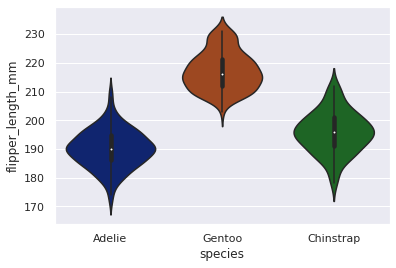

In [ ]:
sns.violinplot(x='species',y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

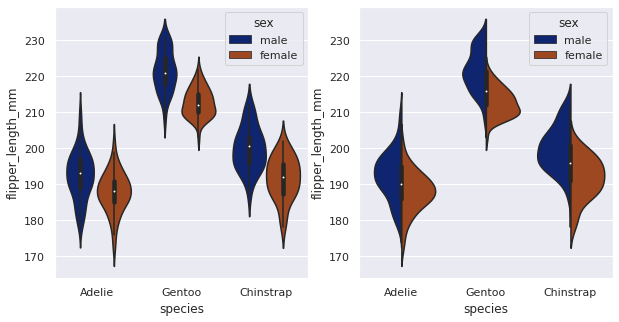

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', split=True, ax = ax[1]) #usa split y une ambas 
#categorias de sex. Es para una categoria con sólo de 2 opciones
plt.show()

##<font color='blue'>Diagramas de Líneas (lineplot)</font>

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `Seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día). 

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


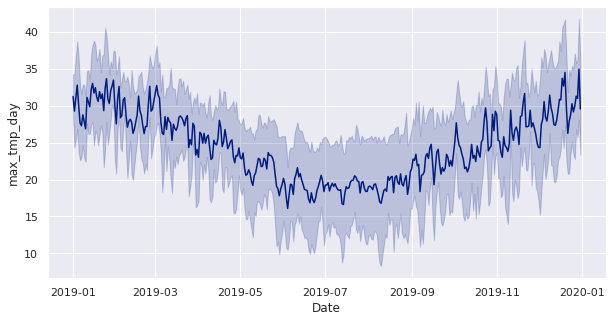

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, ci='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

## <font color='green'>Actividad 1:</font>

Para esta dinámica revisitaremos el set de datos de precios de casa de King County Housing (VD08.csv). Realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [ ]:
housing_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD08.csv")
housing_df.sample(10) #ver datos


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
9746,5422430320,20140721T000000,309950.0,4,2.50,1770,6666,2.0,0,0,3,7,1770,0,1989,0,98023,47.2877,-122.349,1780,6666
14212,8653900150,20140505T000000,800000.0,3,2.50,3240,7857,2.0,0,0,3,10,3240,0,1994,0,98075,47.5857,-122.038,2970,7857
11705,9284800844,20140916T000000,310000.0,4,1.00,1030,5750,1.0,0,0,3,7,1030,0,1971,0,98126,47.5530,-122.370,1250,5750
6480,7203601405,20150414T000000,217000.0,2,1.00,730,2400,1.0,0,1,3,4,730,0,1934,0,98198,47.3500,-122.322,1220,4382
20601,8682301600,20150504T000000,540000.0,3,2.50,1810,3930,2.0,0,0,3,8,1810,0,2008,0,98053,47.7169,-122.020,1560,5100
13348,9285800330,20140702T000000,732000.0,3,3.75,2670,6517,2.5,0,4,4,8,2020,650,1977,0,98126,47.5702,-122.380,2010,6073
19420,3578401210,20141218T000000,557000.0,4,1.75,2660,11315,2.0,0,0,4,8,2660,0,1983,0,98074,47.6204,-122.044,1980,11315
1959,2473251170,20140626T000000,302000.0,4,1.75,1530,17664,1.5,0,0,3,7,1530,0,1968,0,98058,47.4549,-122.155,1530,11625
1872,5505700055,20140730T000000,345000.0,5,3.00,2080,6150,1.0,0,0,3,7,1040,1040,1950,0,98116,47.5707,-122.394,1420,6150


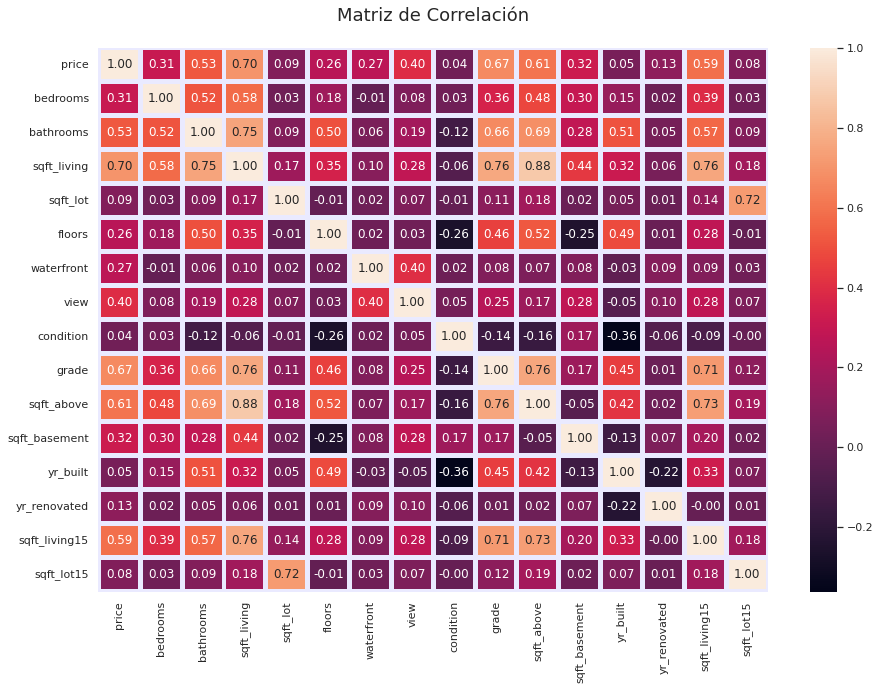

In [ ]:
#1 Matriz de correlación
housing_df.columns
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'sqft_living15', 'sqft_lot15']
corr = housing_df[col].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=4, linecolor='#eaeaff', fmt='.2f')
plt.title('Matriz de Correlación' + '\n', fontsize=18)
plt.show()



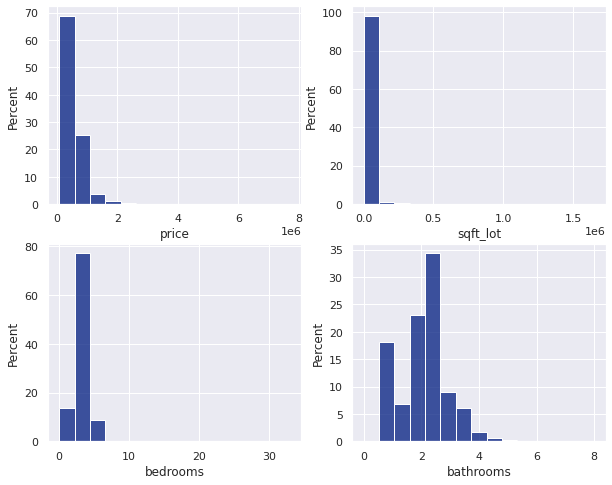

In [ ]:
#2 histogramas
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.histplot(x='price', data=housing_df, stat='percent', ax=ax[0,0], bins=15)
sns.histplot(x='sqft_lot', data=housing_df, stat='percent', ax=ax[0,1], bins=15)
sns.histplot(x='bedrooms', data=housing_df, stat='percent', ax=ax[1,0], bins=15)
sns.histplot(x='bathrooms', data=housing_df, stat='percent', ax=ax[1,1], bins=15)
plt.show()

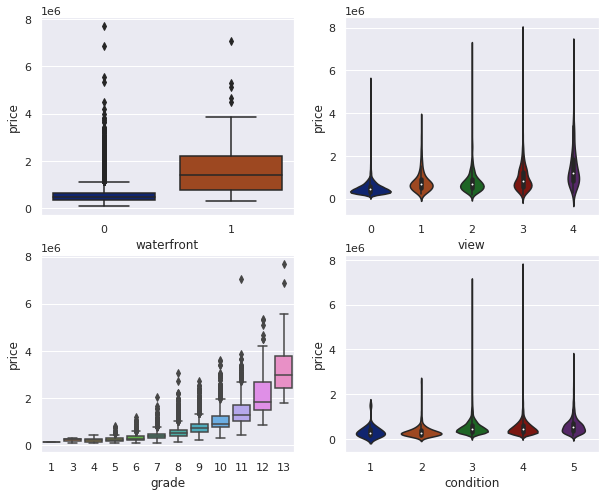

In [ ]:
#3 box and violin plot
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(y='price', x='waterfront', data=housing_df, ax=ax[0,0]) 
sns.violinplot(x='view', y='price', data=housing_df, ax = ax[0,1])
sns.boxplot(y='price', x='grade', data=housing_df, ax=ax[1,0]) 
sns.violinplot(x='condition', y='price', data=housing_df, ax = ax[1,1])
plt.show()

<font color="green">Respecto al primer gráfico, vemos que el precio de la casa aumenta si tener vista al mar; en relación a la vista a medida que este valor, aumenta la dispersión (el rango intercuantil es mayor a medida que la vista aumenta de valor). Además se observa que a mayor grado hay un mayor valor de la casa; y en relación a la condición no se observan mayores diferencias (con excepción de unos valores extremos)</font>

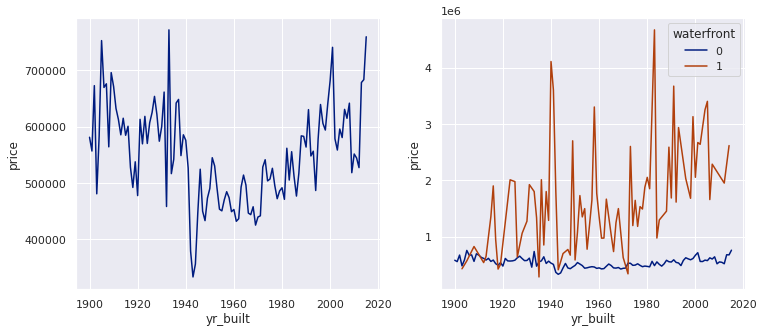

In [ ]:
#4 Line plot
housing_df['waterfront'] = housing_df['waterfront'].astype('category') #replace waterfont column type (numeric) to a category type

fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.lineplot(y='price', x='yr_built', data=housing_df, ax=ax[0], ci=None, estimator=np.mean) 
sns.lineplot(data=housing_df, y='price', x='yr_built', hue='waterfront', ax=ax[1], ci=None, estimator=np.mean)
fig.show() 

<font color="green">El precio de la casa es mayor si la casa tiene vista al mar en casi todos los años observados. cabe decir que el precio en cada año equivale al promedio del valor de las casas que fueron construidas entre los años 1900 y 2020.</font>

<font color='green'>Fin actividad 1</font>